In [1]:
import tensorflow as tf

In [2]:
images_ds = tf.data.Dataset.list_files("images/*/*", shuffle=False)
images_ds = images_ds.shuffle(50)

In [3]:
for imagepath in images_ds.take(3):
    print(imagepath.numpy())

b'images\\cat\\pexels-photo-1170986.jpeg'
b'images\\cat\\photo-1615789591457-74a63395c990.jpg'
b'images\\cat\\original.jpg'


In [4]:
class_names = ['dog', 'cat']

In [5]:
image_count = len(images_ds)
image_count

40

In [6]:
train_size = int(image_count*.8)
train_size

32

In [7]:
train_ds = images_ds.take(train_size)
test_ds = images_ds.skip(train_size)

In [8]:
len(train_ds)

32

In [9]:
import os
def get_label(file_path):
    return tf.strings.split(file_path, os.path.sep)[-2]

In [10]:
def process_images(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [512,512])
    
    return img, label

In [11]:
train_ds = train_ds.map(process_images)
for img, label in train_ds.take(1):
    print(img.numpy())
    print(label.numpy())

[[[17.47461   19.16211   18.31836  ]
  [17.953125  17.953125  17.953125 ]
  [16.855957  16.855957  16.855957 ]
  ...
  [65.79004   56.79004   49.79004  ]
  [66.6084    57.6084    50.6084   ]
  [67.12256   58.12256   51.12256  ]]

 [[15.530273  17.530273  16.530273 ]
  [17.446777  17.446777  17.446777 ]
  [17.015625  17.015625  17.015625 ]
  ...
  [64.60449   55.604492  48.604492 ]
  [63.09375   54.09375   47.09375  ]
  [65.9209    56.9209    49.9209   ]]

 [[18.769043  16.769043  17.769043 ]
  [15.073242  17.052734  16.062988 ]
  [15.498535  15.498535  15.498535 ]
  ...
  [65.061035  56.061035  49.061035 ]
  [66.67139   57.671387  50.671387 ]
  [65.5625    56.5625    49.5625   ]]

 ...

 [[ 4.         4.         4.       ]
  [ 4.5625     4.5625     4.5625   ]
  [ 3.3579102  3.3579102  3.3579102]
  ...
  [10.375     12.21875   11.296875 ]
  [ 5.21875    5.21875    5.21875  ]
  [ 3.784668   3.784668   3.784668 ]]

 [[ 4.         4.         3.0625   ]
  [ 4.         4.         3.0625   ]


In [12]:
def scale(image, lable):
    return image/255.0, label

In [13]:
train_ds = train_ds.map(scale)
for img, label in train_ds.take(1):
    print(img.numpy())
    print(label.numpy())

[[[0.8156863  0.78431374 0.7764706 ]
  [0.8235294  0.7941176  0.7882353 ]
  [0.827451   0.8098039  0.8127451 ]
  ...
  [0.8639246  0.8825521  0.92470896]
  [0.85882354 0.8862745  0.9254902 ]
  [0.87077206 0.9060662  0.9413603 ]]

 [[0.81747854 0.786106   0.77826285]
  [0.8253217  0.79590994 0.79002756]
  [0.827451   0.8098039  0.8127451 ]
  ...
  [0.867693   0.88452816 0.92728245]
  [0.8600184  0.8856771  0.9254902 ]
  [0.86764705 0.90294117 0.9382353 ]]

 [[0.8186428  0.78727025 0.7794271 ]
  [0.8263787  0.7970588  0.79129905]
  [0.8274663  0.8068781  0.82060355]
  ...
  [0.8735754  0.88926166 0.9323989 ]
  [0.8607843  0.88529414 0.9254902 ]
  [0.8637255  0.89889705 0.93425244]]

 ...

 [[0.6469976  0.7175858  0.7255515 ]
  [0.6469976  0.7175858  0.7255515 ]
  [0.6469976  0.7175858  0.7255515 ]
  ...
  [0.85430455 0.7572304  0.6690257 ]
  [0.8529871  0.7588082  0.6648131 ]
  [0.8471201  0.7529412  0.6589461 ]]

 [[0.65251225 0.72424936 0.72314644]
  [0.65251225 0.72424936 0.72314644]


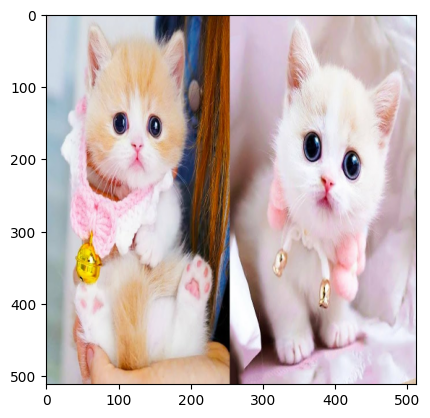

In [14]:
import matplotlib.pyplot as plt
plt.imshow(img.numpy())